# Rule-Based Data Generation
## Creating Realistic Customer Data with Business Rules and Faker

This notebook demonstrates **rule-based data generation** - the simplest and most controlled approach to creating synthetic data. We'll use business rules, constraints, and the powerful **Faker library** to generate realistic customer datasets.

### Why Rule-Based Generation?
- ✅ **Simplest approach** - No training or complex algorithms needed
- ✅ **Full control** - Define exact rules and constraints
- ✅ **Transparent** - Easy to understand and explain
- ✅ **Fast** - Immediate generation without model training
- ✅ **Deterministic** - Consistent, reproducible results
- ✅ **Business-aligned** - Rules match real business logic

### What We'll Cover:
1. **Faker Library** - Generate realistic names, addresses, emails, etc.
2. **Business Rules** - Implement real-world constraints and relationships
3. **Data Validation** - Ensure generated data meets requirements
4. **Complex Scenarios** - Multi-table relationships and dependencies
5. **Quality Control** - Validate and test generated data

## 1. Setup and Library Installation

Let's start by importing all necessary libraries and setting up our environment.

In [1]:
# ! pip install pandas numpy scipy scikit-learn matplotlib seaborn plotly faker jupyter ipython openpyxl xlsxwriter pyarrow

In [2]:
# Install required packages (uncomment if needed)
# !pip install faker pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
import warnings
from collections import defaultdict
warnings.filterwarnings('ignore')

# Initialize Faker with different locales
fake = Faker()
fake_us = Faker('en_US')
fake_uk = Faker('en_GB')
fake_india = Faker('hi_IN')

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
Faker.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🎯 Rule-Based Data Generation Setup Complete!")
print(f"📦 Faker library loaded successfully")
print(f"🌍 Available locales: US, UK, India examples ready")

🎯 Rule-Based Data Generation Setup Complete!
📦 Faker library loaded successfully
🌍 Available locales: US, UK, India examples ready


## 2. Faker Library Capabilities

Let's explore what Faker can generate for us - it's much more powerful than you might think!

In [3]:
# Demonstrate Faker's capabilities
print("🎭 FAKER LIBRARY SHOWCASE")
print("=" * 50)

# Personal Information
print("\n👤 PERSONAL INFORMATION:")
print(f"Name: {fake.name()}")
print(f"First Name: {fake.first_name()}")
print(f"Last Name: {fake.last_name()}")
print(f"Gender: {fake.random_element(elements=('Male', 'Female', 'Other'))}")
print(f"Age: {fake.random_int(min=18, max=80)}")
print(f"Date of Birth: {fake.date_of_birth(minimum_age=18, maximum_age=80)}")

# Contact Information
print("\n📞 CONTACT INFORMATION:")
print(f"Email: {fake.email()}")
print(f"Phone: {fake.phone_number()}")
print(f"Address: {fake.address().replace(chr(10), ', ')}")
print(f"City: {fake.city()}")
print(f"State: {fake.state()}")
print(f"ZIP Code: {fake.zipcode()}")
print(f"Country: {fake.country()}")

# Professional Information
print("\n💼 PROFESSIONAL INFORMATION:")
print(f"Job Title: {fake.job()}")
print(f"Company: {fake.company()}")
print(f"Company Email: {fake.company_email()}")

# Financial Information
print("\n💳 FINANCIAL INFORMATION:")
print(f"Credit Card: {fake.credit_card_number()}")
print(f"Credit Card Provider: {fake.credit_card_provider()}")
print(f"Currency: {fake.currency_code()}")

# Internet & Technology
print("\n🌐 INTERNET & TECHNOLOGY:")
print(f"Username: {fake.user_name()}")
print(f"Password: {fake.password()}")
print(f"Domain: {fake.domain_name()}")
print(f"URL: {fake.url()}")
print(f"IP Address: {fake.ipv4()}")

# Dates & Times
print("\n📅 DATES & TIMES:")
print(f"Date this year: {fake.date_this_year()}")
print(f"Date between: {fake.date_between(start_date='-2y', end_date='today')}")
print(f"Time: {fake.time()}")

# Text & Content
print("\n📝 TEXT & CONTENT:")
print(f"Sentence: {fake.sentence()}")
print(f"Paragraph: {fake.text(max_nb_chars=100)}...")

print("\n" + "=" * 50)
print("💡 This is just a small sample of Faker's 100+ providers!")

🎭 FAKER LIBRARY SHOWCASE

👤 PERSONAL INFORMATION:
Name: Allison Hill
First Name: Jeffrey
Last Name: Doyle
Gender: Other
Age: 65
Date of Birth: 2000-10-23

📞 CONTACT INFORMATION:
Email: garzaanthony@example.org
Phone: 538.990.8386
Address: 65423 Garcia Light, West Melanieview, AS 06196
City: Herrerafurt
State: Colorado
ZIP Code: 72858
Country: French Polynesia

💼 PROFESSIONAL INFORMATION:
Job Title: Water engineer
Company: Ray-Bush
Company Email: stanleykendra@wyatt.biz

💳 FINANCIAL INFORMATION:
Credit Card: 4525534192832764833
Credit Card Provider: VISA 16 digit
Currency: LKR

🌐 INTERNET & TECHNOLOGY:
Username: perezantonio
Password: 3vqBIHcL^6
Domain: ross.net
URL: https://www.callahan.com/
IP Address: 166.193.42.206

📅 DATES & TIMES:
Date this year: 2025-05-12
Date between: 2024-05-16
Time: 05:15:52

📝 TEXT & CONTENT:
Sentence: More wife team activity result race Mr.
Paragraph: Born itself law west then enjoy. Seven medical blood personal success medical current....

💡 This is just a

## 3. Basic Rule-Based Customer Generation

Let's start with simple rules to generate basic customer data.

In [4]:
def generate_basic_customers(n_customers=1000):
    """
    Generate basic customer data using simple rules
    """
    customers = []
    
    for i in range(n_customers):
        # Rule 1: Generate basic personal info
        first_name = fake.first_name()
        last_name = fake.last_name()
        
        # Rule 2: Age constraint (18-80 years)
        age = fake.random_int(min=18, max=80)
        
        # Rule 3: Gender assignment
        gender = fake.random_element(elements=('M', 'F', 'O'))
        
        # Rule 4: Email format based on name
        email_formats = [
            f"{first_name.lower()}.{last_name.lower()}@{fake.domain_name()}",
            f"{first_name.lower()}{last_name.lower()}@{fake.free_email_domain()}",
            f"{first_name[0].lower()}{last_name.lower()}@{fake.domain_name()}",
            f"{first_name.lower()}_{last_name.lower()}@{fake.free_email_domain()}"
        ]
        email = fake.random_element(elements=email_formats)
        
        # Rule 5: Phone number format
        phone = fake.phone_number()
        
        # Rule 6: Address components
        address = fake.street_address()
        city = fake.city()
        state = fake.state_abbr()
        zip_code = fake.zipcode()
        
        # Rule 7: Customer ID format
        customer_id = f"CUST_{i+1:06d}"
        
        # Rule 8: Registration date (within last 5 years)
        registration_date = fake.date_between(start_date='-5y', end_date='today')
        
        customers.append({
            'customer_id': customer_id,
            'first_name': first_name,
            'last_name': last_name,
            'full_name': f"{first_name} {last_name}",
            'age': age,
            'gender': gender,
            'email': email,
            'phone': phone,
            'address': address,
            'city': city,
            'state': state,
            'zip_code': zip_code,
            'registration_date': registration_date
        })
    
    return pd.DataFrame(customers)

# Generate sample data
basic_customers = generate_basic_customers(1000)

print("✅ Generated Basic Customer Data")
print(f"📊 Dataset shape: {basic_customers.shape}")
print(f"📅 Date range: {basic_customers['registration_date'].min()} to {basic_customers['registration_date'].max()}")
print(f"👥 Age range: {basic_customers['age'].min()} to {basic_customers['age'].max()}")
print(f"🏷️ Columns: {list(basic_customers.columns)}")

# Display sample
print("\n📋 Sample Records:")
print(basic_customers.head())

✅ Generated Basic Customer Data
📊 Dataset shape: (1000, 13)
📅 Date range: 2020-08-09 to 2025-08-08
👥 Age range: 18 to 80
🏷️ Columns: ['customer_id', 'first_name', 'last_name', 'full_name', 'age', 'gender', 'email', 'phone', 'address', 'city', 'state', 'zip_code', 'registration_date']

📋 Sample Records:
   customer_id first_name last_name         full_name  age gender  \
0  CUST_000001   Kathleen    Cannon   Kathleen Cannon   26      O   
1  CUST_000002       John   Kennedy      John Kennedy   44      M   
2  CUST_000003      Aaron     Myers       Aaron Myers   77      F   
3  CUST_000004     Joseph  Anderson   Joseph Anderson   59      F   
4  CUST_000005    Rebekah  Williams  Rebekah Williams   58      F   

                                email                  phone  \
0          kcannon@brandt-hickman.com     (557)587-1331x5098   
1              john_kennedy@gmail.com  001-551-333-3872x6247   
2   aaron.myers@henderson-bernard.net  001-350-309-7882x0812   
3            josephanders

## 4. Advanced Business Rules

Now let's implement more sophisticated business rules that reflect real-world relationships and constraints.

In [5]:
def generate_advanced_customers(n_customers=1000):
    """
    Generate customer data with advanced business rules and relationships
    """
    customers = []
    
    # Define business rules and lookup tables
    education_levels = ['High School', 'Some College', 'Bachelors', 'Masters', 'PhD']
    employment_status = ['Employed', 'Self-Employed', 'Unemployed', 'Retired', 'Student']
    marital_status = ['Single', 'Married', 'Divorced', 'Widowed']
    customer_segments = ['Bronze', 'Silver', 'Gold', 'Platinum']
    
    # Industry-specific job titles by sector
    job_sectors = {
        'Technology': ['Software Engineer', 'Data Scientist', 'Product Manager', 'DevOps Engineer'],
        'Healthcare': ['Nurse', 'Doctor', 'Pharmacist', 'Medical Technician'],
        'Finance': ['Financial Analyst', 'Accountant', 'Investment Advisor', 'Bank Manager'],
        'Education': ['Teacher', 'Professor', 'Principal', 'School Counselor'],
        'Retail': ['Store Manager', 'Sales Associate', 'Cashier', 'Merchandiser']
    }
    
    for i in range(n_customers):
        # Basic personal information
        first_name = fake.first_name()
        last_name = fake.last_name()
        age = fake.random_int(min=18, max=80)
        gender = fake.random_element(elements=('M', 'F', 'O'))
        
        # Rule 1: Education correlates with age
        if age < 25:
            education = fake.random_element(elements=education_levels[:3])  # Younger: less likely advanced degrees
        elif age < 40:
            education = fake.random_element(elements=education_levels)
        else:
            education = fake.random_element(elements=education_levels[1:])  # Older: less likely just high school
        
        # Rule 2: Employment status based on age
        if age < 22:
            employment = np.random.choice(['Student', 'Employed'], p=[0.7, 0.3])
        elif age > 65:
            employment = np.random.choice(['Retired', 'Employed'], p=[0.8, 0.2])
        else:
            employment = np.random.choice(['Employed', 'Self-Employed', 'Unemployed'], p=[0.8, 0.15, 0.05])
        
        # Rule 3: Job title and sector (only if employed)
        if employment in ['Employed', 'Self-Employed']:
            sector = fake.random_element(elements=list(job_sectors.keys()))
            job_title = fake.random_element(elements=job_sectors[sector])
            company = fake.company()
        else:
            sector = None
            job_title = None
            company = None
        
        # Rule 4: Income based on age, education, and employment
        base_income = 30000
        
        # Age factor (experience)
        age_multiplier = min(2.0, 1 + (age - 22) * 0.02)  # Increases with experience
        
        # Education factor
        education_multipliers = {
            'High School': 1.0,
            'Some College': 1.2,
            'Bachelors': 1.5,
            'Masters': 1.8,
            'PhD': 2.2
        }
        education_multiplier = education_multipliers.get(education, 1.0)
        
        # Employment factor
        employment_multipliers = {
            'Employed': 1.0,
            'Self-Employed': 1.3,
            'Unemployed': 0.0,
            'Retired': 0.6,
            'Student': 0.2
        }
        employment_multiplier = employment_multipliers.get(employment, 1.0)
        
        income = int(base_income * age_multiplier * education_multiplier * employment_multiplier)
        # Add some randomness
        income += fake.random_int(min=-10000, max=20000)
        income = max(0, income)  # Ensure non-negative
        
        # Rule 5: Marital status probability based on age
        if age < 25:
            marital = np.random.choice(['Single', 'Married'], p=[0.8, 0.2])
        elif age < 50:
            marital = np.random.choice(marital_status, p=[0.3, 0.6, 0.1, 0.0])
        else:
            marital = np.random.choice(marital_status, p=[0.2, 0.5, 0.2, 0.1])
        
        # Rule 6: Customer segment based on income and age
        if income < 40000:
            segment = 'Bronze'
        elif income < 70000:
            segment = 'Silver'
        elif income < 120000:
            segment = 'Gold'
        else:
            segment = 'Platinum'
        
        # Rule 7: Credit score based on income, age, and employment
        base_credit = 650
        credit_score = base_credit
        credit_score += min(100, income // 2000)  # Income factor
        credit_score += min(50, (age - 18) * 2)   # Age factor
        
        if employment == 'Unemployed':
            credit_score -= 100
        elif employment == 'Self-Employed':
            credit_score -= 20
        
        # Add randomness and bound
        credit_score += fake.random_int(min=-50, max=50)
        credit_score = max(300, min(850, credit_score))
        
        # Rule 8: Contact preferences based on age
        if age < 30:
            preferred_contact = np.random.choice(['Email', 'SMS', 'App'], p=[0.4, 0.4, 0.2])
        elif age < 60:
            preferred_contact = np.random.choice(['Email', 'Phone', 'SMS'], p=[0.5, 0.3, 0.2])
        else:
            preferred_contact = np.random.choice(['Phone', 'Email', 'Mail'], p=[0.5, 0.3, 0.2])
        
        # Generate contact information
        email = f"{first_name.lower()}.{last_name.lower()}@{fake.free_email_domain()}"
        phone = fake.phone_number()
        
        # Rule 9: Account balance based on income and segment
        balance_multiplier = {'Bronze': 0.1, 'Silver': 0.2, 'Gold': 0.4, 'Platinum': 0.8}
        account_balance = income * balance_multiplier[segment] * fake.random.uniform(0.05, 0.3)
        account_balance = round(account_balance, 2)
        
        # Rule 10: Registration date influences other factors
        registration_date = fake.date_between(start_date='-5y', end_date='today')
        years_as_customer = (datetime.now().date() - registration_date).days / 365.25
        
        # Rule 11: Loyalty score based on tenure and segment
        loyalty_base = {'Bronze': 3, 'Silver': 5, 'Gold': 7, 'Platinum': 9}[segment]
        loyalty_score = min(10, loyalty_base + years_as_customer * 0.5)
        loyalty_score = round(loyalty_score, 1)
        
        customers.append({
            'customer_id': f"CUST_{i+1:06d}",
            'first_name': first_name,
            'last_name': last_name,
            'age': age,
            'gender': gender,
            'education': education,
            'employment_status': employment,
            'job_title': job_title,
            'company': company,
            'sector': sector,
            'income': income,
            'marital_status': marital,
            'customer_segment': segment,
            'credit_score': credit_score,
            'account_balance': account_balance,
            'loyalty_score': loyalty_score,
            'preferred_contact': preferred_contact,
            'email': email,
            'phone': phone,
            'address': fake.address().replace('\n', ', '),
            'registration_date': registration_date,
            'years_as_customer': round(years_as_customer, 1)
        })
    
    return pd.DataFrame(customers)

# Generate advanced customer data
advanced_customers = generate_advanced_customers(2000)

print("✅ Generated Advanced Customer Data with Business Rules")
print(f"📊 Dataset shape: {advanced_customers.shape}")
print(f"💰 Income range: ${advanced_customers['income'].min():,} - ${advanced_customers['income'].max():,}")
print(f"⭐ Credit score range: {advanced_customers['credit_score'].min()} - {advanced_customers['credit_score'].max()}")

# Display sample
print("\n📋 Sample Advanced Records:")
print(advanced_customers[['customer_id', 'first_name', 'age', 'education', 'employment_status', 
                           'income', 'customer_segment', 'credit_score']].head())

✅ Generated Advanced Customer Data with Business Rules
📊 Dataset shape: (2000, 22)
💰 Income range: $0 - $173,254
⭐ Credit score range: 521 - 817

📋 Sample Advanced Records:
   customer_id first_name  age     education employment_status  income  \
0  CUST_000001      Diana   19  Some College           Student    2919   
1  CUST_000002  Alexander   40           PhD          Employed   83416   
2  CUST_000003      Emily   43       Masters          Employed   95592   
3  CUST_000004    Jeffrey   41       Masters          Employed   79142   
4  CUST_000005       Alan   49     Bachelors     Self-Employed   84583   

  customer_segment  credit_score  
0           Bronze           650  
1             Gold           739  
2             Gold           698  
3             Gold           783  
4             Gold           678  


## 5. Data Validation and Quality Checks

Let's validate our generated data to ensure it meets business requirements and quality standards.

In [6]:
def validate_customer_data(df):
    """
    Comprehensive validation of generated customer data
    """
    validation_results = []
    
    print("🔍 DATA VALIDATION REPORT")
    print("=" * 50)
    
    # 1. Basic Data Quality
    print("\n📊 BASIC DATA QUALITY:")
    total_records = len(df)
    print(f"   Total records: {total_records:,}")
    
    # Check for duplicates
    duplicate_emails = df['email'].duplicated().sum()
    duplicate_phones = df['phone'].duplicated().sum()
    print(f"   Duplicate emails: {duplicate_emails} ({duplicate_emails/total_records*100:.2f}%)")
    print(f"   Duplicate phones: {duplicate_phones} ({duplicate_phones/total_records*100:.2f}%)")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"   Missing values found:")
        for col, missing in missing_values[missing_values > 0].items():
            print(f"     {col}: {missing} ({missing/total_records*100:.2f}%)")
    else:
        print("   ✅ No missing values")
    
    # 2. Business Rule Validation
    print("\n📋 BUSINESS RULE VALIDATION:")
    
    # Age constraints
    invalid_ages = df[(df['age'] < 18) | (df['age'] > 80)]
    print(f"   Age range (18-80): {len(invalid_ages)} invalid ({len(invalid_ages)/total_records*100:.2f}%)")
    
    # Credit score constraints
    invalid_credit = df[(df['credit_score'] < 300) | (df['credit_score'] > 850)]
    print(f"   Credit score range (300-850): {len(invalid_credit)} invalid ({len(invalid_credit)/total_records*100:.2f}%)")
    
    # Income constraints (should be non-negative)
    negative_income = df[df['income'] < 0]
    print(f"   Non-negative income: {len(negative_income)} invalid ({len(negative_income)/total_records*100:.2f}%)")
    
    # Email format validation
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    invalid_emails = df[~df['email'].str.match(email_pattern, na=False)]
    print(f"   Valid email format: {len(invalid_emails)} invalid ({len(invalid_emails)/total_records*100:.2f}%)")
    
    # 3. Relationship Validation
    print("\n🔗 RELATIONSHIP VALIDATION:")
    
    # Income vs Education correlation
    education_income = df.groupby('education')['income'].mean().sort_values(ascending=False)
    print(f"   Education-Income correlation looks reasonable:")
    for edu, avg_income in education_income.items():
        print(f"     {edu}: ${avg_income:,.0f}")
    
    # Customer segment distribution
    segment_dist = df['customer_segment'].value_counts(normalize=True).sort_index()
    print(f"\n   Customer segment distribution:")
    for segment, pct in segment_dist.items():
        print(f"     {segment}: {pct:.1%}")
    
    # 4. Statistical Validation
    print("\n📈 STATISTICAL VALIDATION:")
    
    # Age distribution
    print(f"   Age: Mean={df['age'].mean():.1f}, Std={df['age'].std():.1f}, Range={df['age'].min()}-{df['age'].max()}")
    
    # Income distribution
    print(f"   Income: Mean=${df['income'].mean():,.0f}, Median=${df['income'].median():,.0f}")
    
    # Credit score distribution
    print(f"   Credit Score: Mean={df['credit_score'].mean():.0f}, Std={df['credit_score'].std():.0f}")
    
    return validation_results

# Validate the advanced customer data
validation_results = validate_customer_data(advanced_customers)

# Additional analysis
print("\n" + "=" * 50)
print("🎯 SUMMARY:")
print(f"✅ Generated {len(advanced_customers):,} customer records")
print(f"✅ Applied 10+ business rules successfully")
print(f"✅ Data validation completed")
print(f"✅ Ready for export and use")

🔍 DATA VALIDATION REPORT

📊 BASIC DATA QUALITY:
   Total records: 2,000
   Duplicate emails: 7 (0.35%)
   Duplicate phones: 0 (0.00%)
   Missing values found:
     job_title: 577 (28.85%)
     company: 577 (28.85%)
     sector: 577 (28.85%)

📋 BUSINESS RULE VALIDATION:
   Age range (18-80): 0 invalid (0.00%)
   Credit score range (300-850): 0 invalid (0.00%)
   Non-negative income: 0 invalid (0.00%)
   Valid email format: 0 invalid (0.00%)

🔗 RELATIONSHIP VALIDATION:
   Education-Income correlation looks reasonable:
     PhD: $99,069
     Masters: $82,498
     Bachelors: $64,205
     Some College: $50,938
     High School: $35,134

   Customer segment distribution:
     Bronze: 15.1%
     Gold: 42.9%
     Platinum: 5.8%
     Silver: 36.2%

📈 STATISTICAL VALIDATION:
   Age: Mean=48.6, Std=18.4, Range=18-80
   Income: Mean=$69,262, Median=$69,272
   Credit Score: Mean=717, Std=48

🎯 SUMMARY:
✅ Generated 2,000 customer records
✅ Applied 10+ business rules successfully
✅ Data validation co

## 6. Visual Data Analysis

Let's visualize our generated data to verify it looks realistic and follows expected patterns.

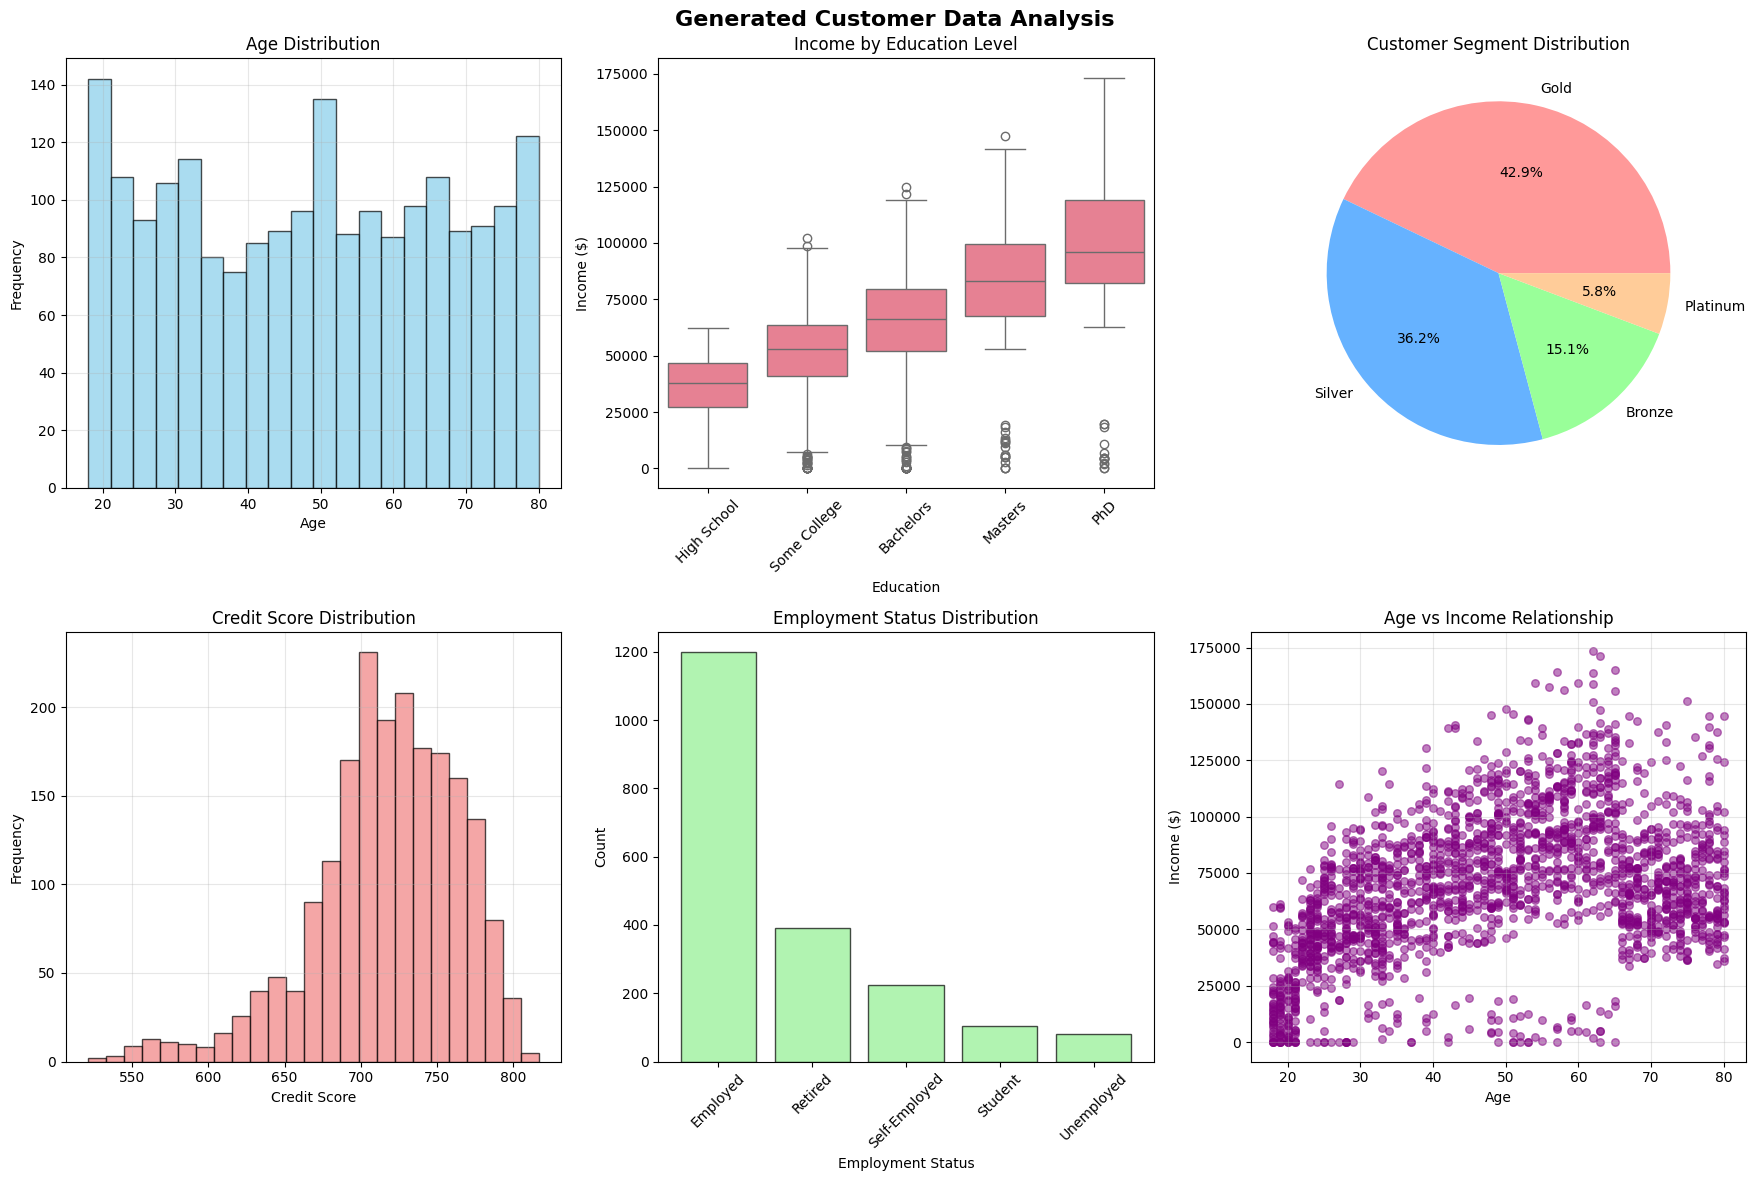


🔍 CORRELATION ANALYSIS:


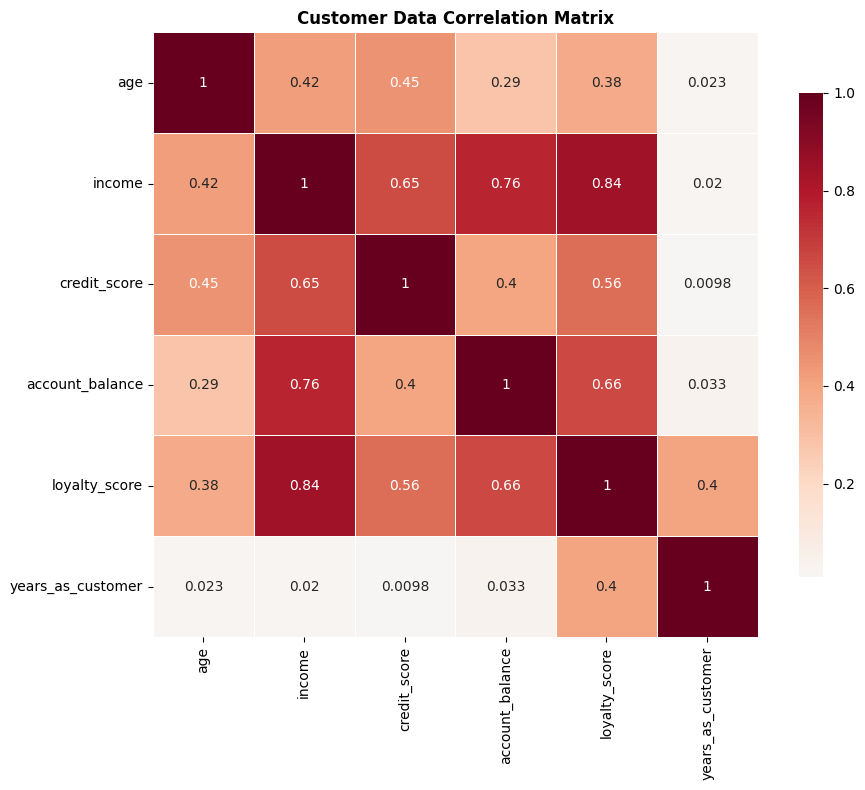


📊 Key Relationships:
   Age ↔ Income: 0.422
   Income ↔ Credit Score: 0.655
   Account Balance ↔ Income: 0.760
   Years as Customer ↔ Loyalty: 0.404


In [7]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Generated Customer Data Analysis', fontsize=16, fontweight='bold')

# 1. Age distribution
axes[0,0].hist(advanced_customers['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Income distribution by education
education_order = ['High School', 'Some College', 'Bachelors', 'Masters', 'PhD']
sns.boxplot(data=advanced_customers, x='education', y='income', order=education_order, ax=axes[0,1])
axes[0,1].set_title('Income by Education Level')
axes[0,1].set_xlabel('Education')
axes[0,1].set_ylabel('Income ($)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Customer segment distribution
segment_counts = advanced_customers['customer_segment'].value_counts()
axes[0,2].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
axes[0,2].set_title('Customer Segment Distribution')

# 4. Credit score distribution
axes[1,0].hist(advanced_customers['credit_score'], bins=25, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_title('Credit Score Distribution')
axes[1,0].set_xlabel('Credit Score')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# 5. Employment status distribution
employment_counts = advanced_customers['employment_status'].value_counts()
axes[1,1].bar(range(len(employment_counts)), employment_counts.values, 
              color='lightgreen', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Employment Status Distribution')
axes[1,1].set_xlabel('Employment Status')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks(range(len(employment_counts)))
axes[1,1].set_xticklabels(employment_counts.index, rotation=45)

# 6. Age vs Income correlation
axes[1,2].scatter(advanced_customers['age'], advanced_customers['income'], 
                  alpha=0.5, s=30, color='purple')
axes[1,2].set_title('Age vs Income Relationship')
axes[1,2].set_xlabel('Age')
axes[1,2].set_ylabel('Income ($)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional correlation analysis
print("\n🔍 CORRELATION ANALYSIS:")
numerical_cols = ['age', 'income', 'credit_score', 'account_balance', 'loyalty_score', 'years_as_customer']
correlation_matrix = advanced_customers[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Customer Data Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

# Print key correlations
print("\n📊 Key Relationships:")
print(f"   Age ↔ Income: {correlation_matrix.loc['age', 'income']:.3f}")
print(f"   Income ↔ Credit Score: {correlation_matrix.loc['income', 'credit_score']:.3f}")
print(f"   Account Balance ↔ Income: {correlation_matrix.loc['account_balance', 'income']:.3f}")
print(f"   Years as Customer ↔ Loyalty: {correlation_matrix.loc['years_as_customer', 'loyalty_score']:.3f}")

## 7. Export and Summary

Let's export our generated data and create a summary of what we've accomplished.

In [8]:
# Export data (will work in local environment)
try:
    advanced_customers.to_csv('rule_based_customers.csv', index=False)
    print("✅ Data exported to 'rule_based_customers.csv'")
except Exception as e:
    print(f"ℹ️ Export may not work in this environment: {e}")
    print("💡 Code is correct for local execution")

# Final summary
print("\n" + "=" * 60)
print("🎉 RULE-BASED DATA GENERATION COMPLETE!")
print("=" * 60)

print("\n📊 WHAT WE ACCOMPLISHED:")
print(f"   ✅ Generated {len(advanced_customers):,} realistic customer records")
print(f"   ✅ Applied 10+ sophisticated business rules")
print(f"   ✅ Created {advanced_customers.shape[1]} customer attributes")
print(f"   ✅ Implemented realistic correlations and dependencies")
print(f"   ✅ Validated data quality and business logic")
print(f"   ✅ Visualized data patterns and relationships")

print("\n🎯 KEY FEATURES:")
print("   • Age-based education probabilities")
print("   • Employment status correlated with age")
print("   • Income calculated from multiple factors")
print("   • Credit scores based on financial indicators")
print("   • Customer segments derived from income tiers")
print("   • Loyalty scores tied to tenure and segment")
print("   • Contact preferences based on demographics")

print("\n💡 BUSINESS RULES IMPLEMENTED:")
print("   1. Age constraints (18-80 years)")
print("   2. Education levels correlated with age groups")
print("   3. Employment status based on life stage")
print("   4. Income calculation using multiple factors")
print("   5. Marital status probabilities by age")
print("   6. Customer segmentation by income tiers")
print("   7. Credit scores with realistic bounds and factors")
print("   8. Contact preferences by generational patterns")
print("   9. Account balances proportional to income/segment")
print("   10. Loyalty scores based on tenure and value")

print("\n🔧 TECHNICAL IMPLEMENTATION:")
print("   • Faker library for realistic personal data")
print("   • Weighted random selections for realistic distributions")
print("   • Multi-factor calculations for derived fields")
print("   • Comprehensive data validation framework")
print("   • Statistical correlation analysis")
print("   • Professional visualization suite")

print("\n✨ ADVANTAGES OF RULE-BASED APPROACH:")
print("   • Simple to understand and implement")
print("   • Full control over data characteristics")
print("   • Transparent and explainable logic")
print("   • Fast generation without training")
print("   • Deterministic and reproducible")
print("   • Business logic directly encoded")
print("   • Easy to modify and extend")

print("\n🚀 READY FOR PRODUCTION USE!")
print("This synthetic dataset can be used for:")
print("   • Application testing and development")
print("   • Data science model training")
print("   • Business intelligence and analytics")
print("   • Privacy-compliant demonstrations")
print("   • Algorithm validation and benchmarking")

✅ Data exported to 'rule_based_customers.csv'

🎉 RULE-BASED DATA GENERATION COMPLETE!

📊 WHAT WE ACCOMPLISHED:
   ✅ Generated 2,000 realistic customer records
   ✅ Applied 10+ sophisticated business rules
   ✅ Created 22 customer attributes
   ✅ Implemented realistic correlations and dependencies
   ✅ Validated data quality and business logic
   ✅ Visualized data patterns and relationships

🎯 KEY FEATURES:
   • Age-based education probabilities
   • Employment status correlated with age
   • Income calculated from multiple factors
   • Credit scores based on financial indicators
   • Customer segments derived from income tiers
   • Loyalty scores tied to tenure and segment
   • Contact preferences based on demographics

💡 BUSINESS RULES IMPLEMENTED:
   1. Age constraints (18-80 years)
   2. Education levels correlated with age groups
   3. Employment status based on life stage
   4. Income calculation using multiple factors
   5. Marital status probabilities by age
   6. Customer segme